✅ Concept: What is Clustering?
Clustering is the process of grouping data points that are similar to each other.
There are no labels — the algorithm finds the structure itself.

🔍 Why it matters:

Customer segmentation
Market basket analysis
Document grouping
Anomaly detection

🧠 Popular Clustering Algorithms

K-Means Clustering (centroid-based)
DBSCAN (density-based)
Hierarchical Clustering (tree-based)

We'll start with K-Means since it's the most intuitive and widely used.

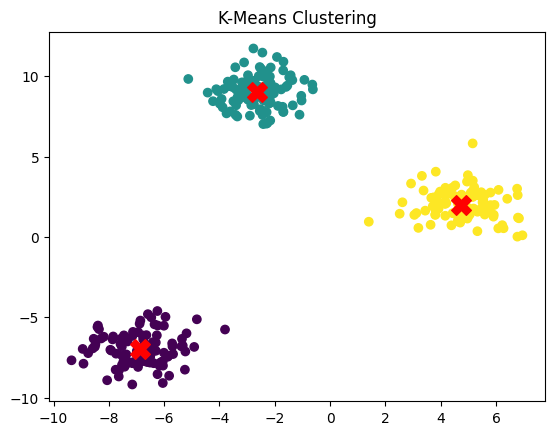

In [1]:
# ✅ Step 1: K-Means Clustering Basics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Fit KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering")
plt.show()


✅ What’s happening:

make_blobs() → creates sample cluster-like data
KMeans() → creates a clustering model
.fit() → applies it to data
.labels_ → gets assigned cluster for each point

✅ Step 2: Choosing the Right Number of Clusters (Elbow Method)
When using K-Means, you must predefine the number of clusters (k).
But how do we choose the best k?

💡 Elbow Method
We calculate inertia (sum of squared distances of points from their closest cluster center) for different values of k.

Then, we plot and look for a point where the drop in inertia slows down — this is the elbow.

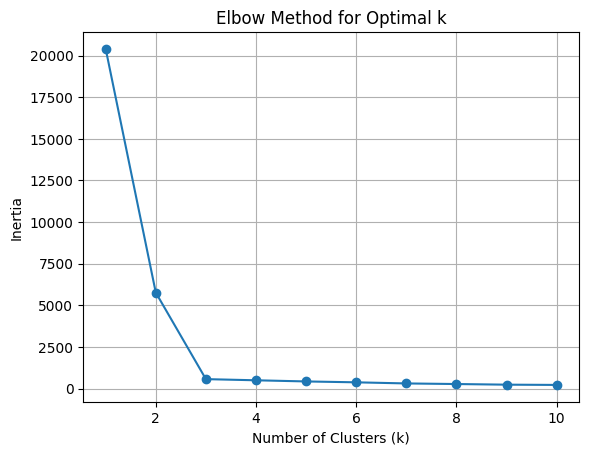

In [2]:
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

✅ What’s happening:

- We test k from 1 to 10
- Plot inertia vs. k
- The "elbow" point (where the curve bends) is the best value for k

✅ Step 3: KMeans Clustering on Real Data (Mall Customers Dataset)
Let’s apply KMeans to a real-world dataset:
Mall Customer Segmentation

📥 Dataset Columns:
CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1–100)

We’ll cluster customers based on:
Annual Income
Spending Score

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male 

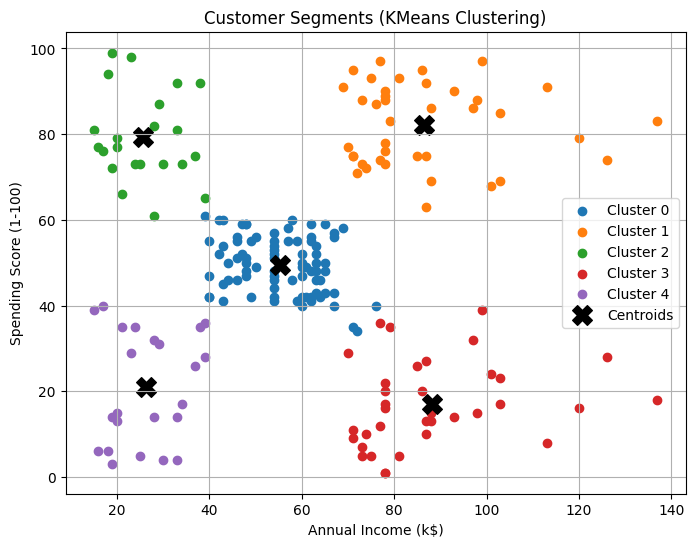

In [ ]:
# https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv("./Mall_Customers.csv")
print(df)

# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
# selecting the two columns from your DataFrame that you want to use for clustering:
# Annual Income (in thousands of dollars)
# Spending Score (1–100 scale)
# This new variable X is your feature matrix, used as input to the algorithm.

# Fit KMeans
kmeans = KMeans(n_clusters=5, random_state=42) # telling kmeans model to divide the data into 5 clusters
#n_clusters=5 → You assume there are 5 types of customer behavior groups. setup is done next train model - fit
df['Cluster'] = kmeans.fit_predict(X)
print(df)
# fit_predict(X) does 2 things:
# Fit: It runs the KMeans algorithm on your data (assigns clusters).
# Predict: It returns a list of cluster labels (0 to 4) for each row.

# 🎯 What you get after this:
# Every customer in the dataset is now assigned a Cluster number (0 to 4)
# These groupings can be visualized or analyzed separately to understand customer types.

# Visualize
plt.figure(figsize=(8, 6))
for cluster in range(5):
    cluster_points = df[df['Cluster'] == cluster] #Filters the DataFrame to get only the rows (customers) that belong to the current cluster. df['Cluster'] == cluster is a condition that returns only data points in that cluster.
    plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'], label=f"Cluster {cluster}") #label sets legend

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (KMeans Clustering)')
plt.legend()
plt.grid(True)
plt.show()


✅ This helps businesses group customers:

High Income + High Spend → VIPs
Low Income + High Spend → Bargain lovers
High Income + Low Spend → Cautious buyers
etc.

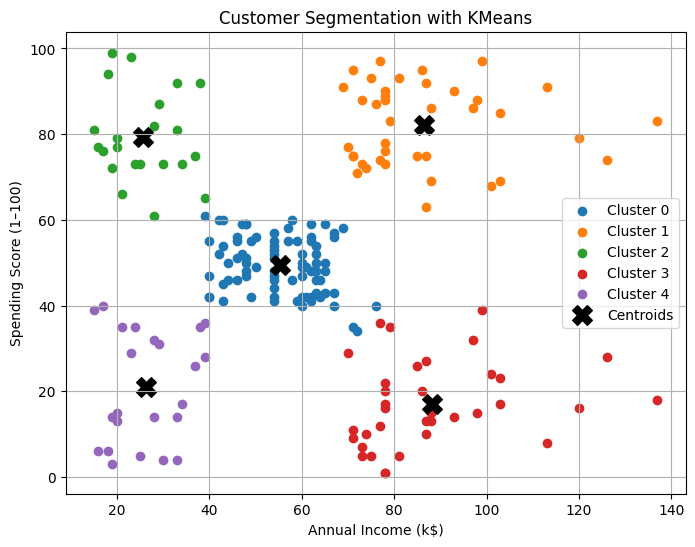

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 2. Fit model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# 3. Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(5):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Annual Income (k$)'], 
                cluster_points['Spending Score (1-100)'], 
                label=f"Cluster {cluster}")

# 4. Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], 
            c='black', s=200, marker='X', label='Centroids')

# 5. Labels and final touches
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.title("Customer Segmentation with KMeans")
plt.legend()
plt.grid(True)
plt.show()


✅ What This Does:

Plots each cluster in a different color
Adds big black 'X' markers for cluster centers (centroids)
Helps you visually understand how customers are grouped

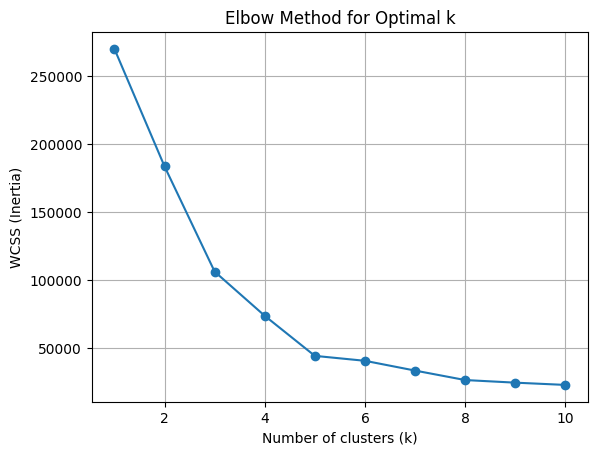

In [10]:
# 📉 STEP: Elbow Method (to find optimal k)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 1. Try different values of k (number of clusters)
wcss = []  # within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia = WCSS

# 2. Plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


✅ What This Does:
Plots the within-cluster error (WCSS) for each k (1 to 10)
The point where the curve "bends" like an elbow is the optimal k

❓How to Decide Best k?
Look for a sharp "elbow point" where the drop in WCSS becomes smaller.
For example, if the elbow appears at k = 5, that means 5 clusters is best.

In our case, based on common retail data — the elbow usually appears at k = 5, which is why we used it earlier.

🏁 Project: Customer Segmentation for a Fashion Brand

📦 Dataset:
Simulated customer data:
customer_id, age, gender, income, spending_score, membership_years

In [11]:
# 🧩 STEP 1: Create the dataset
import pandas as pd
import numpy as np

np.random.seed(42)

n = 200
df = pd.DataFrame({
    'CustomerID': range(1, n+1),
    'Age': np.random.randint(18, 60, size=n),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'Annual Income (k$)': np.random.randint(20, 120, size=n),
    'Spending Score (1-100)': np.random.randint(10, 100, size=n),
    'Membership Years': np.random.randint(1, 10, size=n)
})

print(df.head())


   CustomerID  Age  Gender  Annual Income (k$)  Spending Score (1-100)  \
0           1   56    Male                  43                      45   
1           2   46  Female                  51                      91   
2           3   32  Female                  66                      33   
3           4   25    Male                 105                      32   
4           5   38  Female                  42                      71   

   Membership Years  
0                 5  
1                 3  
2                 1  
3                 5  
4                 9  


In [12]:
# 🧩 STEP 2: Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [13]:
# 🧩 STEP 3: Normalize numeric columns
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)', 'Membership Years']
scaler = StandardScaler()
scaled = scaler.fit_transform(df[features])


In [14]:
# 🧩 STEP 4: Apply KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled)

df['Cluster'] = clusters
print(df.groupby('Cluster').mean())


         CustomerID        Age    Gender  Annual Income (k$)  \
Cluster                                                        
0        106.452381  45.619048  0.880952           44.714286   
1         90.409091  34.863636  0.000000           79.727273   
2        108.785714  47.452381  0.000000           65.976190   
3         93.606061  31.393939  0.969697           77.454545   
4        102.384615  32.153846  0.974359           79.153846   

         Spending Score (1-100)  Membership Years  
Cluster                                            
0                     37.690476          5.809524  
1                     36.886364          3.204545  
2                     69.190476          5.976190  
3                     66.272727          7.333333  
4                     55.871795          2.102564  


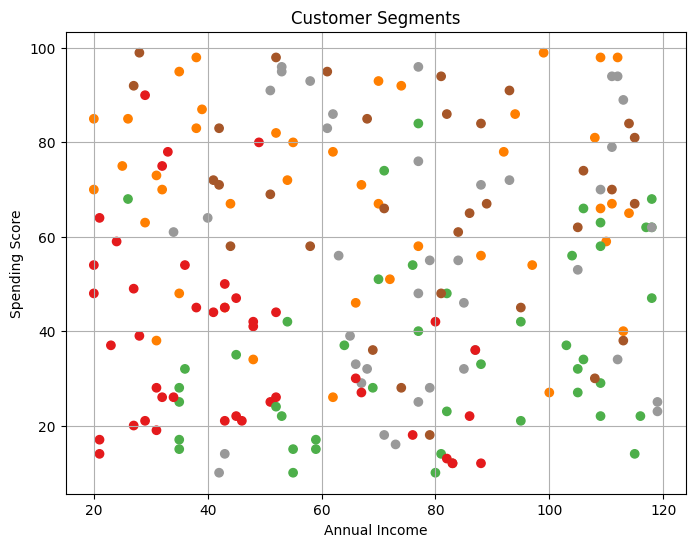

In [15]:
# 🧩 STEP 5: Visualize clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='Set1')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.grid(True)
plt.show()


✅ Final Deliverables:
Clustering applied to real-world-like data

Insight: Which type of customer spends more? Which cluster is most loyal?